In [10]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [11]:
stock_name = "AAPL"
stock_info = yf.Ticker(stock_name)
df = stock_info.history(period="max")
df = df.tail(365)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-29 00:00:00-04:00,144.862480,145.477223,139.488376,141.273132,128138200,0.0,0.0
2022-09-30 00:00:00-04:00,140.083270,141.887861,136.831055,137.029358,124925300,0.0,0.0
2022-10-03 00:00:00-04:00,137.039287,141.858121,136.523688,141.243362,114311700,0.0,0.0
2022-10-04 00:00:00-04:00,143.801498,144.981421,143.038017,144.862442,87830100,0.0,0.0
2022-10-05 00:00:00-04:00,142.849647,146.131607,141.798613,145.159897,79471000,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-07 00:00:00-05:00,169.149994,170.729996,168.490005,169.000000,71765100,0.0,0.0
2024-03-08 00:00:00-05:00,169.000000,173.699997,168.940002,170.729996,76114600,0.0,0.0
2024-03-11 00:00:00-04:00,172.940002,174.380005,172.050003,172.750000,60139500,0.0,0.0


In [12]:
df.shape

(365, 7)

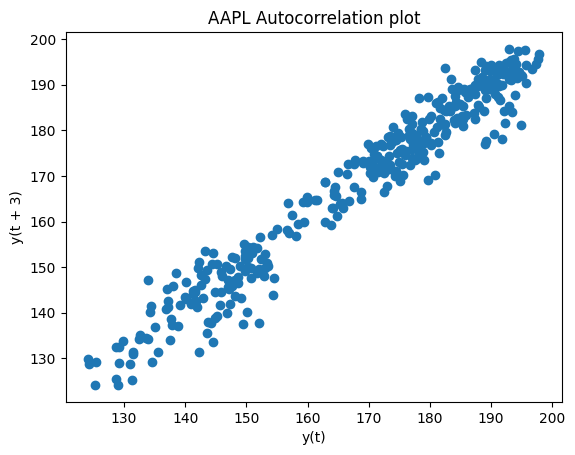

In [13]:
plt.figure()
lag_plot(df['Close'], lag=3)
plt.title(stock_name + ' Autocorrelation plot')
plt.show()

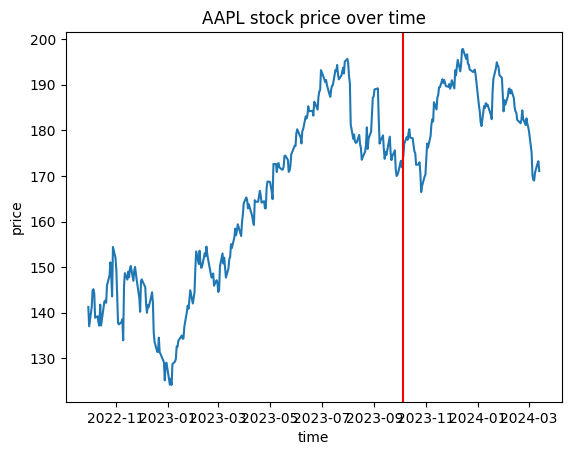

In [14]:
# plot df
plt.plot(df.index.values, df["Close"])
plt.axvline(df.index.values[int(len(df)*0.7)], color='red')
plt.title(stock_name + " stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [15]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 4.150793904450687


AttributeError: 'DataFrame' object has no attribute 'Date'

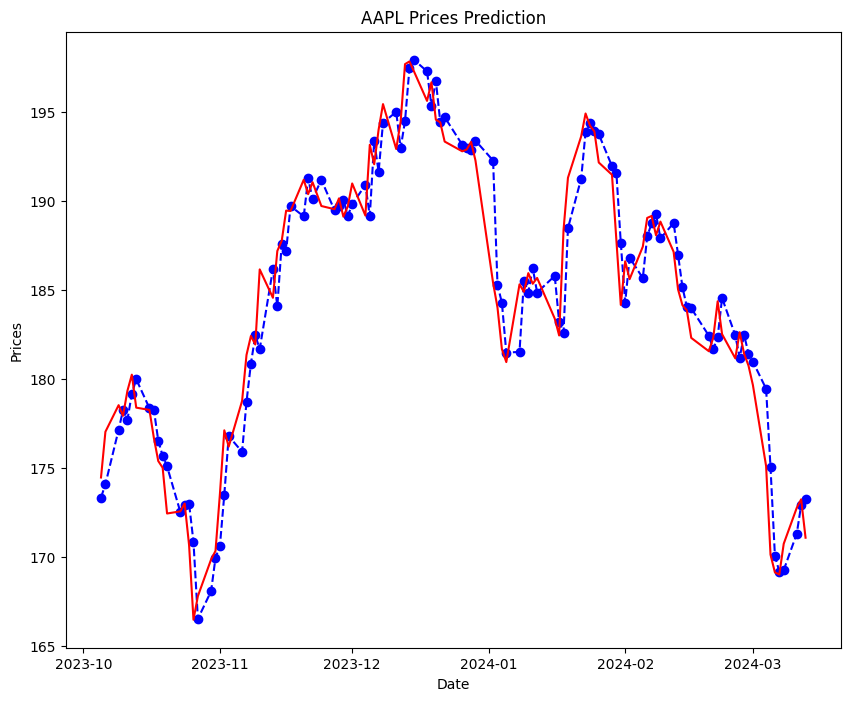

In [16]:
test_set_range = df[int(len(df)*0.7):].index
figure(figsize=(10, 8), dpi=100)
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title(stock_name + ' Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,len(test_set_range)), df.Date[0:len(test_set_range)])
plt.legend()
plt.show()

In [2]:
from predictor import predict

print(predict(["TSLA", "AAPL", "AMZN", "GOOG", "META"]))

{'TSLA': 172.0465107068762, 'AAPL': 171.09451417473372, 'AMZN': 176.64760446876122, 'GOOG': 141.2418096506032, 'META': 493.8064067184384}
